# 1. Data Description

- 1.1 해당 데이터 선정 이유
- 1.2 문제제기 방향
- 1.3 분석 목표

---


> ## 1.1 해당 데이터 선정 이유
- 데이터 분석가로 거듭나기 위한 선상에 있는 청중들을 대상으로 커리어코칭을 한다는 설정 하 \
  데이터직종의 이직트렌드를 소개하기 적합하단 판단으로 데이터 선정 \
  
> - 대한민국에서의 데이터직군의 역사는 길지 않아 데이터 또한 많지 않았기에, \
데이터 산업의 근간이었던 미국의 데이터를 선정

  







> ## 1.2 문제제기 방향
- 이직성향이 어떤 특성으로 인해 좌우되는지 순위별로 확인

> - IT 직군에서의 이직은 도메인지식을 얻기 전까지는 빈번한 편에 속한다고 하는데, 단순 카더라가 아닌,\
  데이터적으로도 근속연차에 따라 이직률의 차이가 있는지 분석한다.

> - IT산업의 경우 신 산업분야중 하나이기에 대한민국의 판교처럼 업무환경이 인프라가 좋은곳인 경우가 많은데, 이는 보다 좋은인프라를 가진 도시로의 이직 희망율과 연관지을 수 있을 것 같다. 따라서 도시의 개발지수에 따라 이직희망율이 어떤지 분석한다




> ## 1.3 분석 목표
- 데이터 직군 종사자들의 이직성향을 파악하여 예비 데이터직군 종사자들에게 시사한다.





In [ ]:
#@title
# import sys
# if 'google.colab' in sys.modules:
#     #Install packages in Colab
#     !pip3 install pandas==1.2
#     !pip3 install jinja2==3.0.3
#     !pip3 install h5py
#     !pip3 install typing-extensions
#     !pip3 install wheel
#     !pip3 install imgaug==0.2.5
#     !pip3 install eli5
#     !pip3 install pandas-profiling==2.*
#     !pip3 install pandas-profiling --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org
#     !pip3 install pdpbox==0.2.0
#     !pip3 install shap
#     !apt -qq -y install fonts-nanum > /dev/null

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from pdpbox import pdp
import shap
import eli5
from eli5.sklearn import PermutationImportance

# 2. Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_raw = pd.read_csv('/content/drive/MyDrive/HR Analytics/HR_Analytics_DataJob_Search.csv')

In [ ]:
train = train_raw
train.head(10)

,enrollee_id,gender,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,Male,Graduate,Humanities,65,Has relevent experience,<1,1,city_40,0.776,Pvt Ltd,1000-4999,0
1,29117,NaN,Graduate,STEM,12,No relevent experience,<1,Never,city_11,0.550,NaN,NaN,0
2,30937,Female,Graduate,STEM,83,No relevent experience,<1,2,city_57,0.866,Pvt Ltd,10/49,0
3,25290,NaN,High School,NaN,29,Has relevent experience,<1,1,city_173,0.878,Pvt Ltd,100-500,0
4,10481,NaN,Graduate,Business Degree,214,No relevent experience,<1,Never,city_102,0.804,NaN,NaN,0
5,24226,Female,Graduate,STEM,13,Has relevent experience,<1,1,city_21,0.624,Pvt Ltd,50-99,0
6,17783,Male,Graduate,STEM,11,Has relevent experience,<1,2,city_65,0.802,Pvt Ltd,10000+,0
7,17941,NaN,Masters,Business Degree,18,No relevent experience,<1,1,city_21,0.624,Pvt Ltd,10000+,0
8,20653,Male,Graduate,STEM,44,No relevent experience,<1,1,city_16,0.910,NaN,NaN,0
9,15297,NaN,NaN,NaN,34,No relevent experience,<1,Never,city_103,0.920,NaN,NaN,0


In [ ]:
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Exploratory Data Analysis_(EDA)






> ## 3.1 Feature Engineering



---

In [ ]:
train.isna().sum()

enrollee_id                  0
gender                    4508
education_level            460
major_discipline          2785
training_hours               0
relevent_experience          0
experience                  65
last_new_job               423
city                         0
city_development_index       0
company_type              6140
company_size              5938
target                       0
dtype: int64



>> ### 3.1_1 Enrollee_id

---












In [ ]:
train.enrollee_id.value_counts().max()
# 중복값이 없음을 확인

1

In [ ]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열
train = train.sort_values('enrollee_id')

In [ ]:
# enrollee_id를 index로 지정 완료
train = train.set_index('enrollee_id')
train.head()

,gender,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
enrollee_id,,,,,,,,,,,,
1,Male,High School,NaN,150,No relevent experience,2,Never,city_103,0.920,Pvt Ltd,NaN,0
2,Male,Phd,STEM,128,No relevent experience,<1,3,city_103,0.920,NGO,10000+,1
4,Male,Masters,STEM,13,No relevent experience,<1,>4,city_103,0.920,Public Sector,50-99,0
5,Male,Masters,STEM,12,Has relevent experience,10,1,city_67,0.855,Early Stage Startup,<10,0
7,Male,Masters,STEM,18,Has relevent experience,13,1,city_136,0.897,NaN,NaN,0


>> ### 3.1_2 City, City_development Wrangling


---




In [ ]:
# city column은 city_code형태로 되어있으며, 이는 도시를 code화 시킨 고유값임을 알 수 있음. / 오탈자가 없어 따로 핸들링하지 않음
train.city.unique()

array(['city_103', 'city_67', 'city_136', 'city_16', 'city_114',
       'city_21', 'city_23', 'city_73', 'city_104', 'city_10', 'city_100',
       'city_46', 'city_105', 'city_97', 'city_74', 'city_61', 'city_57',
       'city_160', 'city_65', 'city_45', 'city_72', 'city_41', 'city_44',
       'city_40', 'city_131', 'city_98', 'city_115', 'city_118',
       'city_71', 'city_20', 'city_159', 'city_173', 'city_64', 'city_28',
       'city_102', 'city_84', 'city_101', 'city_11', 'city_27', 'city_36',
       'city_50', 'city_13', 'city_144', 'city_91', 'city_145',
       'city_165', 'city_134', 'city_152', 'city_24', 'city_162',
       'city_39', 'city_37', 'city_1', 'city_106', 'city_83', 'city_150',
       'city_99', 'city_80', 'city_142', 'city_33', 'city_138', 'city_75',
       'city_53', 'city_128', 'city_9', 'city_30', 'city_12', 'city_141',
       'city_116', 'city_157', 'city_175', 'city_25', 'city_149',
       'city_123', 'city_19', 'city_76', 'city_89', 'city_143', 'city_70',
   

In [ ]:
# city_development_index의 최소, 최대값을 확인하고, 이에따라 0.1단위로 등급을 부여
print(train.city_development_index.max())
print(train.city_development_index.min())

0.949
0.448


In [ ]:
train["city_development_index"] = round(train["city_development_index"]*10,0)
train = train.rename(columns={'city_development_index':'CDI'})

In [ ]:
train.CDI = train.CDI.astype(int)
train.CDI.unique()

array([9, 6, 8, 7, 4, 5])

In [ ]:
train.head()

,gender,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,CDI,company_type,company_size,target
enrollee_id,,,,,,,,,,,,
1,Male,High School,NaN,150,No relevent experience,2,Never,city_103,9,Pvt Ltd,NaN,0
2,Male,Phd,STEM,128,No relevent experience,<1,3,city_103,9,NGO,10000+,1
4,Male,Masters,STEM,13,No relevent experience,<1,>4,city_103,9,Public Sector,50-99,0
5,Male,Masters,STEM,12,Has relevent experience,10,1,city_67,9,Early Stage Startup,<10,0
7,Male,Masters,STEM,18,Has relevent experience,13,1,city_136,9,NaN,NaN,0



>> ### 3.1_3 Gender

---

In [ ]:
train.gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [ ]:
train.gender = train.gender.fillna(value = 'No Data')
train.gender.unique()

array(['Male', 'Female', 'No Data', 'Other'], dtype=object)

>> ### 3.1_4 Relevent_Experience
---

In [ ]:
# 사실상 boolean으로, T,F로 분류
train.relevent_experience.unique()

array(['No relevent experience', 'Has relevent experience'], dtype=object)

In [ ]:
train.relevent_experience = train.relevent_experience.replace("No relevent experience", 'F')
train.relevent_experience = train.relevent_experience.replace("Has relevent experience", 'T')
train.relevent_experience.unique()

array(['F', 'T'], dtype=object)

>> ### 3.1_5 Education_Level

---



In [ ]:
train.education_level.unique()

array(['High School', 'Phd', 'Masters', 'Graduate', 'Primary School', nan],
      dtype=object)

In [ ]:
train.education_level = train.education_level.fillna(value = 'No Data')
train.education_level.unique()

array(['High School', 'Phd', 'Masters', 'Graduate', 'Primary School',
       'No Data'], dtype=object)

>> ### 3.1_6 Major_Discipline

---

In [ ]:
train.major_discipline.unique()

array([nan, 'STEM', 'Humanities', 'Business Degree', 'Other', 'Arts'],
      dtype=object)

In [ ]:
train.major_discipline = train.major_discipline.fillna(value = 'No Data')
train.major_discipline.unique()

array(['No Data', 'STEM', 'Humanities', 'Business Degree', 'Other',
       'Arts'], dtype=object)

>> ### 3.1_7 Experience
---

In [ ]:
train.experience.unique()

array(['2', '<1', '10', '13', '>20', '15', '11', '5', '7', '8', '4', '9',
       '3', '6', '14', '12', '1', '16', '19', '17', '18', '20', nan],
      dtype=object)

In [ ]:
train.experience = train.experience.replace(">20", "21")
train.experience = train.experience.replace("<1", "0")
train.experience = train.experience.fillna(value = "-1")
train.experience = train.experience.apply(pd.to_numeric)
train.experience.unique()

array([ 2,  0, 10, 13, 21, 15, 11,  5,  7,  8,  4,  9,  3,  6, 14, 12,  1,
       16, 19, 17, 18, 20, -1])

>> ### 3.1_8 Company_Size

---

In [ ]:
train.company_size.unique()

array([nan, '10000+', '50-99', '<10', '100-500', '1000-4999', '5000-9999',
       '10/49', '500-999'], dtype=object)

In [ ]:
train.company_size = train.company_size.replace("<10", "9")
train.company_size = train.company_size.replace("10/49", "49")
train.company_size = train.company_size.replace("50-99", "99")
train.company_size = train.company_size.replace("100-500", "499")
train.company_size = train.company_size.replace("500-999", "999")
train.company_size = train.company_size.replace("1000-4999", "4999")
train.company_size = train.company_size.replace("5000-9999", "9999")
train.company_size = train.company_size.replace("10000+", "10000")
train.company_size = train.company_size.fillna(value = '0')
train.company_size = train.company_size.apply(pd.to_numeric)
train.company_size.unique()

array([    0, 10000,    99,     9,   499,  4999,  9999,    49,   999])

>> ### 3.1_9 Company_Type
---

In [ ]:
train.company_type.unique()

array(['Pvt Ltd', 'NGO', 'Public Sector', 'Early Stage Startup', nan,
       'Funded Startup', 'Other'], dtype=object)

In [ ]:
train.company_type = train.company_type.fillna(value = 'No Data')
train.company_type.unique()

array(['Pvt Ltd', 'NGO', 'Public Sector', 'Early Stage Startup',
       'No Data', 'Funded Startup', 'Other'], dtype=object)

>> ### 3.1_10 Last_New_Job

---

In [ ]:
train.last_new_job.unique()

array(['Never', '3', '>4', '1', '2', '4', nan], dtype=object)

In [ ]:
train.last_new_job = train.last_new_job.replace("Never", 0)
train.last_new_job = train.last_new_job.replace(">4", 5)
train.last_new_job = train.last_new_job.fillna(value = -1)
train.last_new_job = train.last_new_job.apply(pd.to_numeric)
train.last_new_job.unique()

array([ 0,  3,  5,  1,  2,  4, -1])

>> ### 3.1_11 Final Confirmation

---

In [ ]:
# 데이터수의 변화가 없음을 확인
train.shape

(19158, 12)

In [ ]:
# column순서 변경
train=train[['CDI','gender', 'relevent_experience','education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target']]
train.head()

,CDI,gender,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,
1,9,Male,F,High School,No Data,2,0,Pvt Ltd,0,150,0
2,9,Male,F,Phd,STEM,0,10000,NGO,3,128,1
4,9,Male,F,Masters,STEM,0,99,Public Sector,5,13,0
5,9,Male,T,Masters,STEM,10,9,Early Stage Startup,1,12,0
7,9,Male,T,Masters,STEM,13,0,No Data,1,18,0


In [ ]:
train.target = train.target.astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 1 to 33380
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CDI                  19158 non-null  int64 
 1   gender               19158 non-null  object
 2   relevent_experience  19158 non-null  object
 3   education_level      19158 non-null  object
 4   major_discipline     19158 non-null  object
 5   experience           19158 non-null  int64 
 6   company_size         19158 non-null  int64 
 7   company_type         19158 non-null  object
 8   last_new_job         19158 non-null  int64 
 9   training_hours       19158 non-null  int64 
 10  target               19158 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.3+ MB




> ## 3.2 Encoding

---





In [ ]:
# 레이블 인코더로 데이터셋 인코딩
le = preprocessing.LabelEncoder()
train_enc = train.apply(le.fit_transform)

In [ ]:
train_enc.head()

,CDI,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,
1,5,1,0,2,1,3,2,0,6,0,146,0
2,5,1,0,2,4,6,15,8,2,3,125,1
4,5,1,0,2,2,6,9,3,5,5,12,0
5,5,1,1,2,2,6,10,1,0,1,11,0
7,5,1,1,0,2,6,13,0,3,1,17,0


In [ ]:
target = 'target'
feature = train_enc.drop([target], axis = 1).columns

In [ ]:
# 학습, 테스트데이터 나누기

train_base, test_base = train_test_split(train_enc, train_size = 0.8, test_size = 0.2,
                              stratify = train_enc[target], random_state = 2)

In [ ]:
X_train_enc = train_base[feature]
y_train_enc = train_base[target]
X_test = test_base[feature]
y_test = test_base[target]

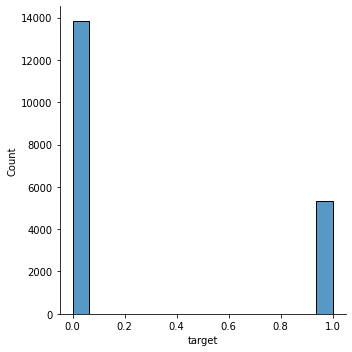

In [ ]:
# 데이터 불균형 확인

sns.displot(train_enc.target)

> ## 3.3 Over Sampling

---

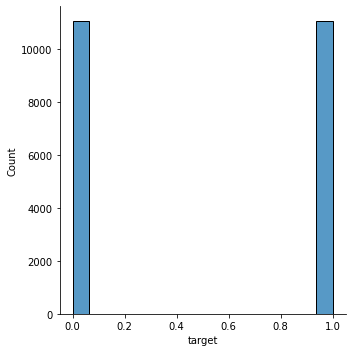

In [ ]:
# 데이터 불균형 해소를 위해 Over Sampling(SMOTE)실시

oversample = SMOTE(random_state=2)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_enc, y_train_enc)
sns.displot(y_train_smote)

# 4. Modeling



> ### 4.1 Only Encoding Model(Before Over Sampling)

---





In [ ]:
# Random Forest / encoding_data
# 오버샘플링을 하지 않고 인코딩만 한 데이터로 학습한 RF모델

rfc = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
rfc.fit(X_train_enc,y_train_enc)
rfc_prediction = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, rfc_prediction)
rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                            precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                            roc_auc_score(y_test, rfc_prediction)], 
                      columns=['Encoding Data Random Forest Score'],
                      index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score"])
rfc_df 

,Encoding Data Random Forest Score
Accuracy,0.702766
Recall,0.476995
Precision,0.466055
F1-score,0.471462
ROC AUC Score,0.633330


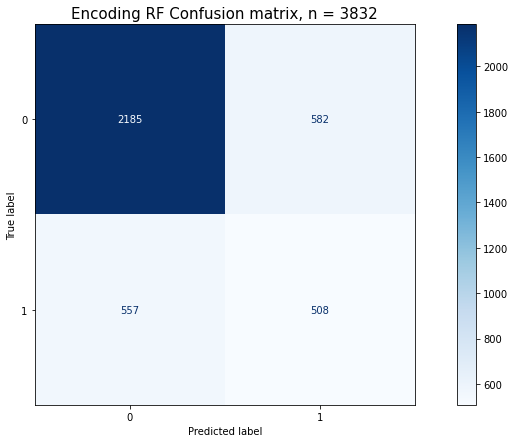

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(rfc, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Encoding RF Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
# XGBoost / encoding_data
# 오버샘플링을 하지 않고 인코딩만 한 데이터로 학습한 XGB모델

xgbc = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
xgbc.fit(X_train_enc,y_train_enc)
xgb_prediction = xgbc.predict(X_test)
cm_xgb = confusion_matrix(y_test, xgb_prediction)
xgbc_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                             precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                             roc_auc_score(y_test, xgb_prediction)], 
                       columns=['Encoding Data XGBoost Score'],
                       index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score"])
xgbc_df 

,Encoding Data XGBoost Score
Accuracy,0.724426
Recall,0.476995
Precision,0.504469
F1-score,0.490347
ROC AUC Score,0.648328


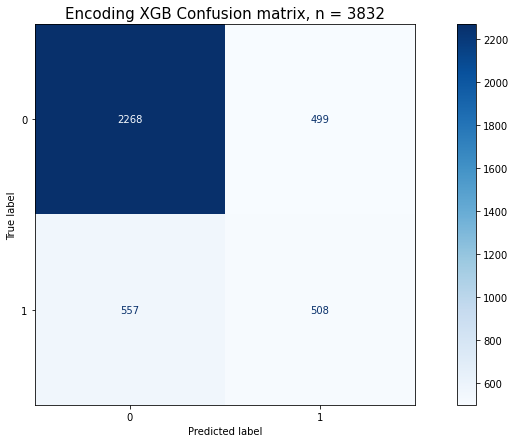

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(xgbc, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Encoding XGB Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

> ### 4.2 Over Sampling Model(After Over Sampling)

---

In [ ]:
# Random Forest / SMOTE_data
# 오버샘플링 한 데이터로 학습한 RF모델

rfc_ov = RandomForestClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
rfc_ov.fit(X_train_smote, y_train_smote)
rfc_prediction = rfc_ov.predict(X_test)
cm_rfc_ov = confusion_matrix(y_test, rfc_prediction)
rfc_ov_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                            precision_score(y_test, rfc_prediction),  f1_score(y_test, rfc_prediction),
                            roc_auc_score(y_test, rfc_prediction)], 
                      columns=['SMOTE Data Random Forest Score'],
                      index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score"])
rfc_ov_df 

,SMOTE Data Random Forest Score
Accuracy,0.743737
Recall,0.618779
Precision,0.533603
F1-score,0.573043
ROC AUC Score,0.705306


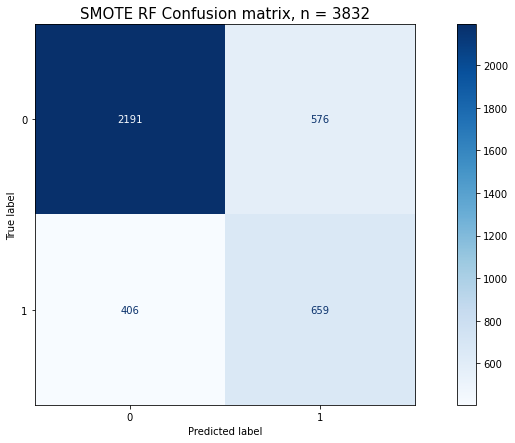

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(rfc_ov, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'SMOTE RF Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
# XGBoost / SMOTE_data
# 오버샘플링 한 데이터로 학습한 XGB모델

xgb_ov = XGBClassifier(random_state=2, n_estimators= 100, criterion = 'gini',max_features = 'auto',max_depth = 5)
xgb_ov.fit(X_train_smote, y_train_smote)
xgb_prediction = xgb_ov.predict(X_test)
cm_xgb_ov = confusion_matrix(y_test, xgb_prediction)
xgb_ov_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction)], 
                            columns=['SMOTE Data XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score"])
xgb_ov_df 

,SMOTE Data XGBoost Score
Accuracy,0.749478
Recall,0.647887
Precision,0.541176
F1-score,0.589744
ROC AUC Score,0.718234


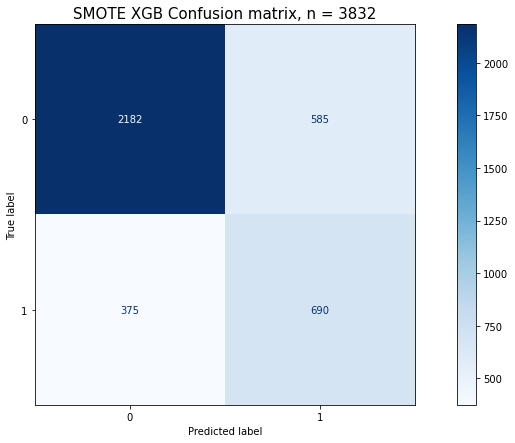

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(xgb_ov, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'SMOTE XGB Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

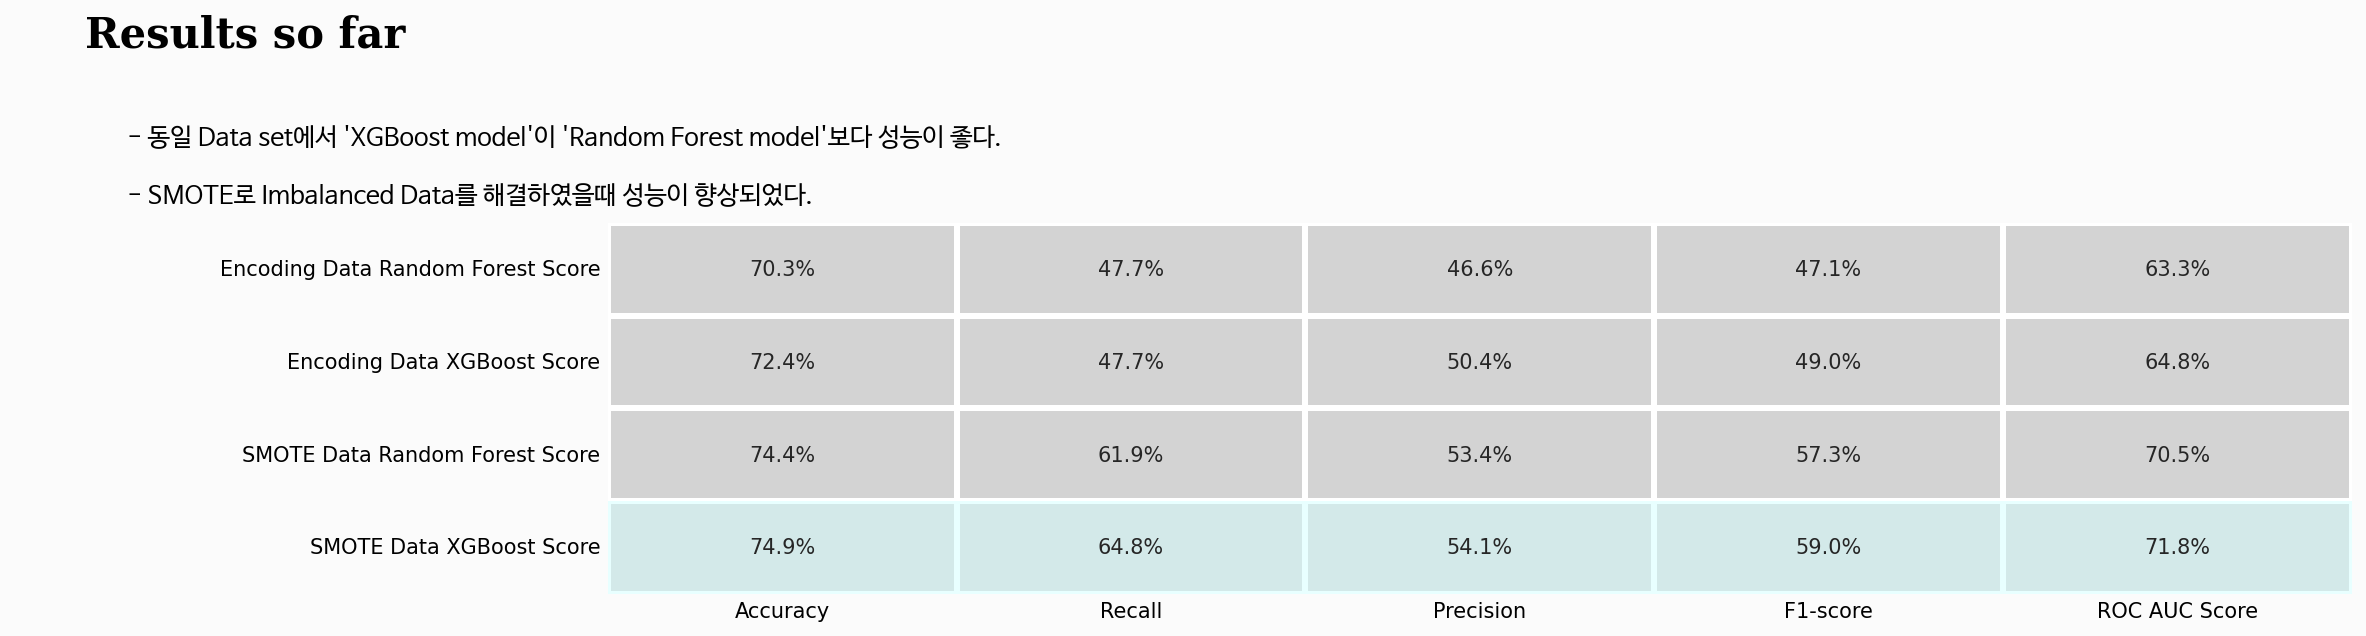

In [ ]:
fig = plt.figure(figsize=(15,18), dpi=150)
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

# Overall

df_models = round(pd.concat([rfc_df, xgbc_df, 
                             rfc_ov_df, xgb_ov_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(-1.5,-1.9,'Results so far',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(-1.7,0.1,'''
                    - 동일 Data set에서 'XGBoost model'이 'Random Forest model'보다 성능이 좋다.

                    - SMOTE로 Imbalanced Data를 해결하였을때 성능이 향상되었다.
                    ''',
         fontfamily='NanumBarunGothic',fontsize=12)

from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 3), 5, 1, fill=True,color='#D3FFFF', edgecolor='white', lw=0,alpha=0.5))

plt.show()

> ### 4.3 Best Model(XGBoost using SMOTE_data) HyperParameter Tuning & Threshold

---

In [ ]:
xgb = XGBClassifier(randome_state = 2)
xgb.fit(X_train_smote, y_train_smote)
xgb_prediction = xgb.predict(X_test)

dists = {
    'silent': [False], # 동작 메시지를 프린트하지 않음
    'max_depth': randint(2,20), # 트리의 최대 깊이
    'learning_rate': [0.05, 0.1, 0.2, 0,3], # 학습률
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 데이터의 샘플링 비율
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 노드 depth 마다 사용할 칼럼(Feature)의 비율
    'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 트리 depth 마다 사용할 칼럼(Feature)의 비율
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], # 관측에서 요구되는 최소 가중치의 합 / over-fitting vs under-fitting을 조정하기 위한 파라미터
    'gamma': [0, 0.25, 0.5, 1.0], # 분할을 수행하는데 필요한 최소 손실 감소를 지정한다. / Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있다.(알고리즘을 보수적으로 만듬)
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], # 가중치에 대한 L2 정규화 용어
    'n_estimators': [100,200,300,400,500] # 모델 객체 지정
    }

fit_dists = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 50,
              'eval_set': [(X_test, xgb_prediction)]}

rs_xgb = RandomizedSearchCV(xgb, dists, n_iter=10, # n_iter : 파라미터 검색 횟수
                            n_jobs=-1, verbose=2, cv=10, # cv : 교차검증 시 fold 갯수
                            scoring='f1', refit=False, random_state=2)

In [ ]:
# Find Best Parameters

rs_xgb.fit(X_train_smote, y_train_smote)
best_score = rs_xgb.best_score_
best_params = rs_xgb.best_params_
print("Best score: ", best_score)
print("Best params: ")
for param_name in sorted(best_params.keys()):
  print('%s: %r' % (param_name, best_params[param_name]))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score:  0.8125778458068517
Best params: 
colsample_bylevel: 0.5
colsample_bytree: 1.0
gamma: 0
learning_rate: 0.2
max_depth: 11
min_child_weight: 1.0
n_estimators: 200
reg_lambda: 50.0
silent: False
subsample: 0.7


In [ ]:
# # Fitting Best Parameters

xgb_ov_hyp = XGBClassifier(**best_params, n_jobs = -1)

eval_set = [(X_train_smote, y_train_smote),
            (X_test, y_test)]

xgb_ov_hyp.fit(X_train_smote, y_train_smote, 
           eval_set=eval_set,
           eval_metric='error',
           early_stopping_rounds=50,
           verbose = 0
           )

xgb_prediction = xgb_ov_hyp.predict(X_test)
cm_xgb_ov_hyp = confusion_matrix(y_test, xgb_prediction)
xgb_ov_hyp_df = pd.DataFrame(data=[accuracy_score(y_test, xgb_prediction), recall_score(y_test, xgb_prediction),
                                  precision_score(y_test, xgb_prediction),  f1_score(y_test, xgb_prediction),
                                  roc_auc_score(y_test, xgb_prediction)], 
                            columns=['SMOTE Data Hyper XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score"])
xgb_ov_hyp_df

,SMOTE Data Hyper XGBoost Score
Accuracy,0.760960
Recall,0.677934
Precision,0.557529
F1-score,0.611864
ROC AUC Score,0.735425


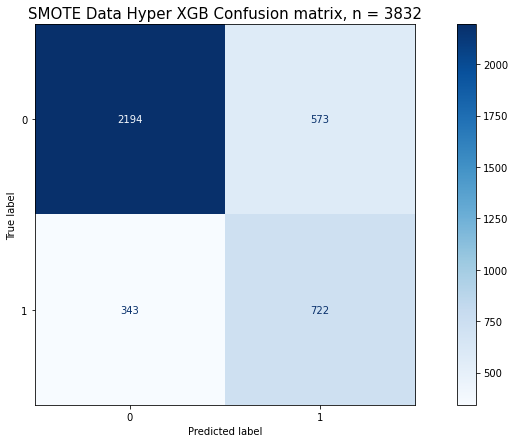

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(xgb_ov_hyp, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'SMOTE Data Hyper XGB Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
# 임계값 조절
threshold = 0.5
y_pred_proba1 = xgb_ov_hyp.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba1 > threshold
  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

threshold = optimal_threshold
y_pred_proba2 = xgb_ov_hyp.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba2 > threshold

xgb_ov_hyp_thr_df = pd.DataFrame(data=[accuracy_score(y_test, pred_test), recall_score(y_test, pred_test),
                                  precision_score(y_test, pred_test),  f1_score(y_test, pred_test),
                                  roc_auc_score(y_test, pred_test)], 
                            columns=['SMOTE Data Hyper Threshold XGBoost Score'],
                            index=["Accuracy", "Recall", "Precision", "F1-score", "ROC AUC Score"])
print("최적의 임계값 :", threshold)
xgb_ov_hyp_thr_df

최적의 임계값 : 0.38239694


,SMOTE Data Hyper Threshold XGBoost Score
Accuracy,0.730167
Recall,0.769953
Precision,0.509633
F1-score,0.613313
ROC AUC Score,0.742403


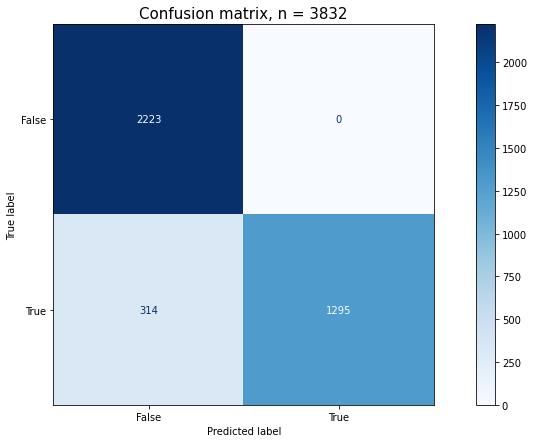

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(xgb_ov_hyp, X_test, pred_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
cm_XGB_ov_hyp_thr = np.array([[2223,  0],[ 314,  1295]])

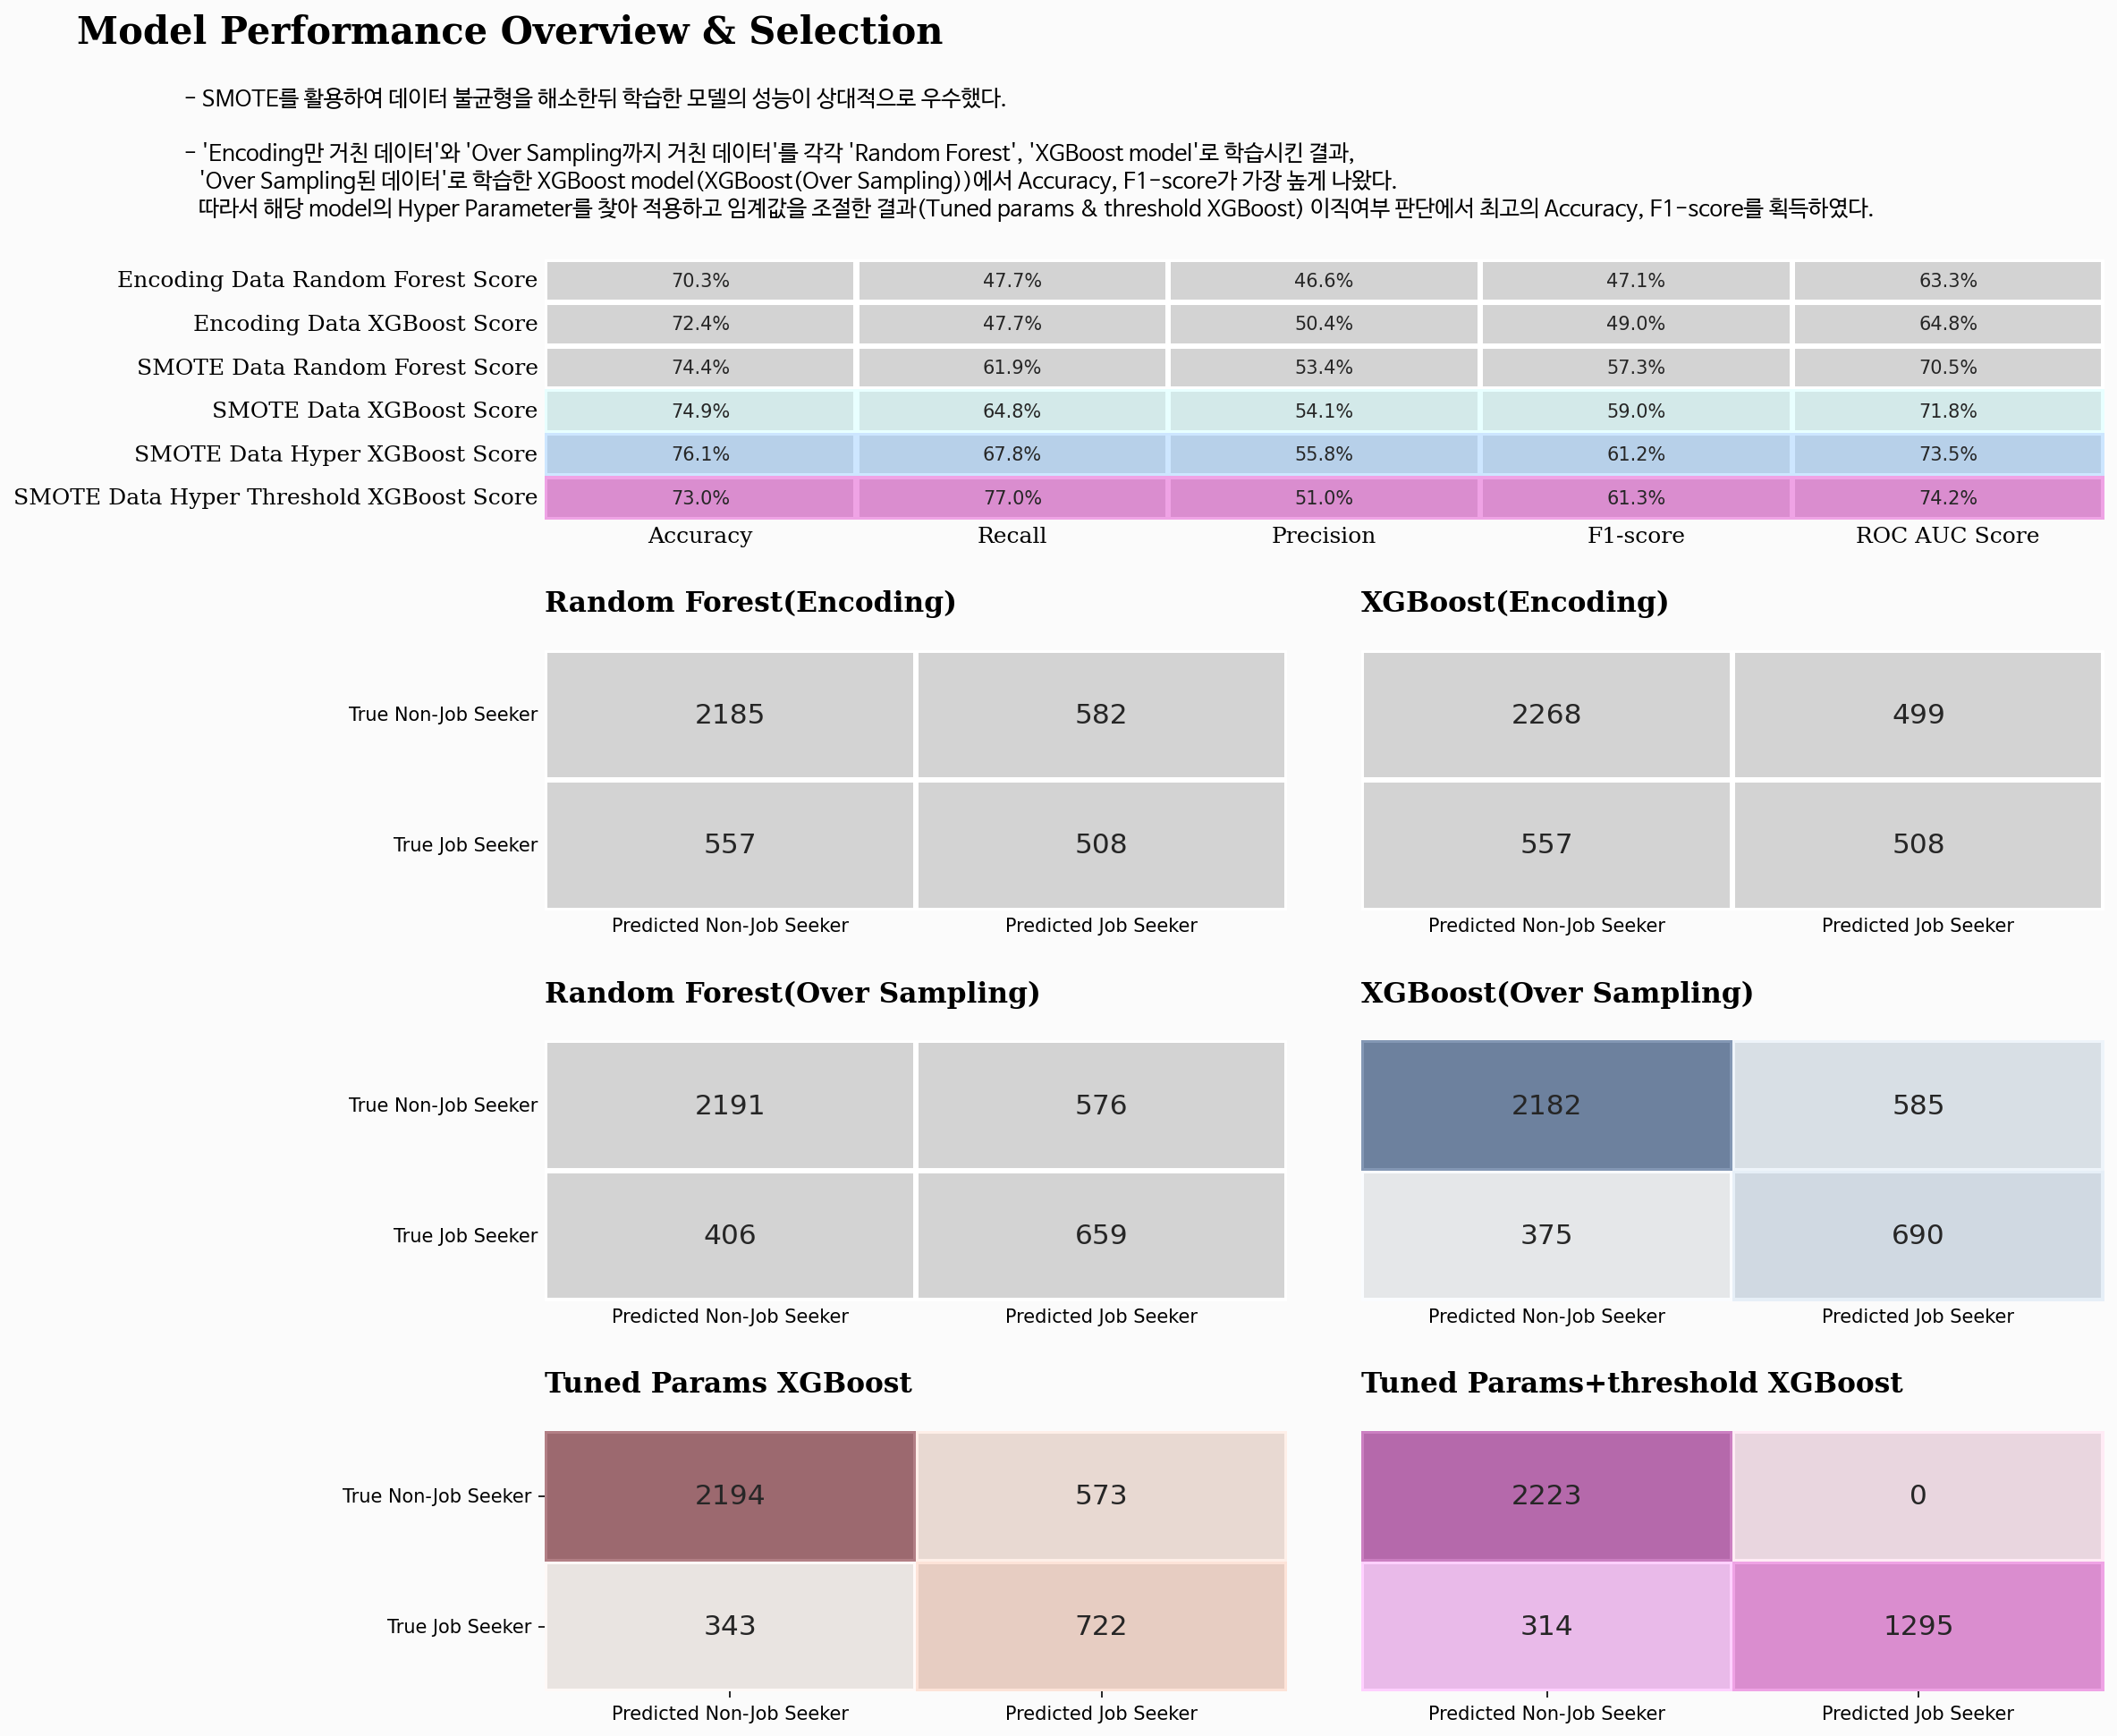

In [ ]:
# Plotting our results

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(15,18), dpi=150) # create figure
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])

# Overall
df_models = round(pd.concat([rfc_df, xgbc_df, rfc_ov_df, xgb_ov_df, xgb_ov_hyp_df, xgb_ov_hyp_thr_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)


ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=12)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=12)

ax0.text(-1.5,-5,'Model Performance Overview & Selection',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(-1.3,0.2,
         '''
         - SMOTE를 활용하여 데이터 불균형을 해소한뒤 학습한 모델의 성능이 상대적으로 우수했다.

         - 'Encoding만 거친 데이터'와 'Over Sampling까지 거친 데이터'를 각각 'Random Forest', 'XGBoost model'로 학습시킨 결과,
            'Over Sampling된 데이터'로 학습한 XGBoost model(XGBoost(Over Sampling))에서 Accuracy, F1-score가 가장 높게 나왔다.
            따라서 해당 model의 Hyper Parameter를 찾아 적용하고 임계값을 조절한 결과(Tuned params & threshold XGBoost) 이직여부 판단에서 최고의 Accuracy, F1-score를 획득하였다.

         '''
         ,fontfamily='NanumBarunGothic',fontsize=12
         )

rect = ax0.add_patch(Rectangle((0, 3), 5, 1, fill=True,color='#D3FFFF', edgecolor='white', lw=0,alpha=0.5))
rect = ax0.add_patch(Rectangle((0, 4), 5, 1, fill=True,color='#9DCFFF', edgecolor='white', lw=0,alpha=0.5))
rect = ax0.add_patch(Rectangle((0, 5), 5, 1, fill=True,color='#E148CD', edgecolor='white', lw=0,alpha=0.5))

from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


# Random Forest(Encoding)
sns.heatmap(cm_rfc, linewidths=2.5,yticklabels=['True Non-Job Seeker','True Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# XGBoost(Encoding)
sns.heatmap(cm_xgb, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

# Random Forest(Over Sampling)
sns.heatmap(cm_rfc_ov, linewidths=2.5,yticklabels=['True Non-Job Seeker','True Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax3,annot_kws={"fontsize":15})

# XGBoost(Over Sampling)
sns.heatmap(cm_xgb_ov, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax4,annot_kws={"fontsize":15})

# Tuned params XGBoost
sns.heatmap(cm_xgb_ov_hyp, linewidths=2.5,yticklabels=['True Non-Job Seeker','True Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax5,annot_kws={"fontsize":15})

# Tuned params & threshold XGBoost
sns.heatmap(cm_XGB_ov_hyp_thr, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax6,annot_kws={"fontsize":15})

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) 

ax0.set_xlabel("")
ax0.set_ylabel("")

ax1.text(0, -0.3, 'Random Forest(Encoding)',fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'XGBoost(Encoding)', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.3, 'Random Forest(Over Sampling)',fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.3, 'XGBoost(Over Sampling)', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, -0.3, 'Tuned Params XGBoost',fontsize=15, fontweight='bold', fontfamily='serif')
ax6.text(0, -0.3, 'Tuned Params+threshold XGBoost',fontsize=15, fontweight='bold', fontfamily='serif')

ax4.add_patch(Rectangle((0, 0), 1, 1, fill=True,color='#08306B', edgecolor='white', lw=0,alpha=0.5))
ax4.add_patch(Rectangle((0, 1), 1, 1, fill=True,color='#F7FBFF', edgecolor='white', lw=0,alpha=0.5))
ax4.add_patch(Rectangle((1, 0), 1, 1, fill=True,color='#DEEBF7', edgecolor='white', lw=0,alpha=0.5))
ax4.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#CEE0F1', edgecolor='white', lw=0,alpha=0.5))

ax5.add_patch(Rectangle((0, 0), 1, 1, fill=True,color='#67000C', edgecolor='white', lw=0,alpha=0.5))
ax5.add_patch(Rectangle((0, 1), 1, 1, fill=True,color='#FFF5F0', edgecolor='white', lw=0,alpha=0.5))
ax5.add_patch(Rectangle((1, 0), 1, 1, fill=True,color='#FEE0D2', edgecolor='white', lw=0,alpha=0.5))
ax5.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#FCC8B3', edgecolor='white', lw=0,alpha=0.5))

ax6.add_patch(Rectangle((0, 0), 1, 1, fill=True,color='#990085', edgecolor='white', lw=0,alpha=0.5))
ax6.add_patch(Rectangle((0, 1), 1, 1, fill=True,color='#FFA2FF', edgecolor='white', lw=0,alpha=0.5))
ax6.add_patch(Rectangle((1, 0), 1, 1, fill=True,color='#FFD9EC', edgecolor='white', lw=0,alpha=0.5))
ax6.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#E148CD', edgecolor='white', lw=0,alpha=0.5))

colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for i in range(0,5):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,5):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,5):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

#5. Analyze

---

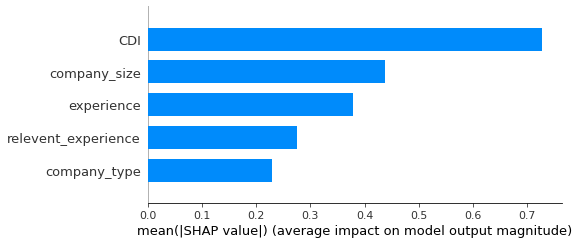

In [ ]:
explainer = shap.TreeExplainer(xgb_ov_hyp)
shap_values = explainer.shap_values(X_test.iloc[:])
shap.summary_plot(shap_values, X_test.iloc[:], plot_type="bar",  max_display = 5)
# 도시개발지수, 회사규모(회사에 종사중인 사원 수), 직종경험연차 이하 순

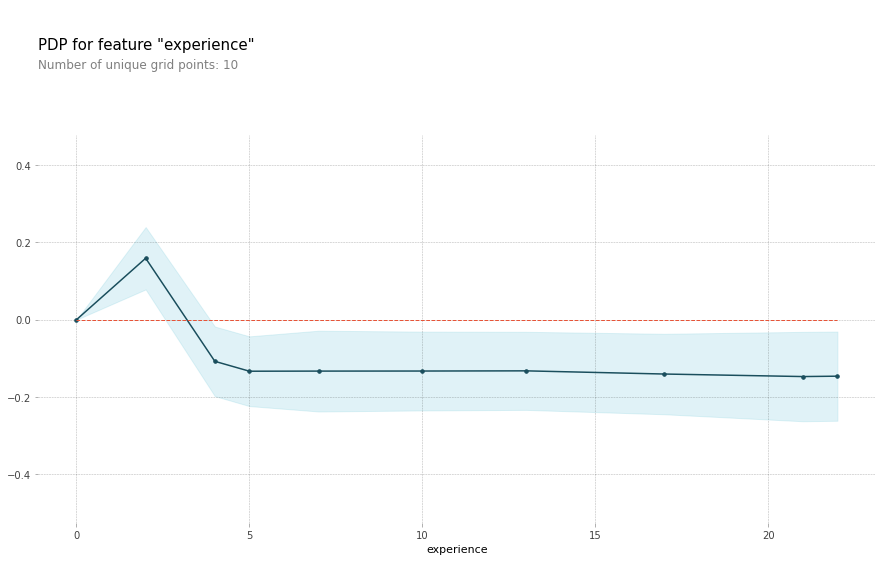

In [ ]:
features = X_test.columns
feature = 'experience'
pdp_dist = pdp.pdp_isolate(model=xgb_ov_hyp, dataset=X_test, model_features=features, feature=feature);
pdp.pdp_plot(pdp_dist, feature);
# 직종경험연차가 1년차부터 3년차까지 이직희망율이 비교적 높았으며(양수), 이후 감소함(음수)을 알 수 있음
# 이로인해 1-3년차의 주니어 분석가들은 경험과 지식이 쌓이면 보다 나은 대우를 받기 위해 이직하려 한다는 것을 추측할 수 있으며,
# 연차가 5년 이상일 경우부터 이직률이 음의영역에서 그려지므로, 한 직장에 정착하려 한다는 것을 추측할 수 있음.

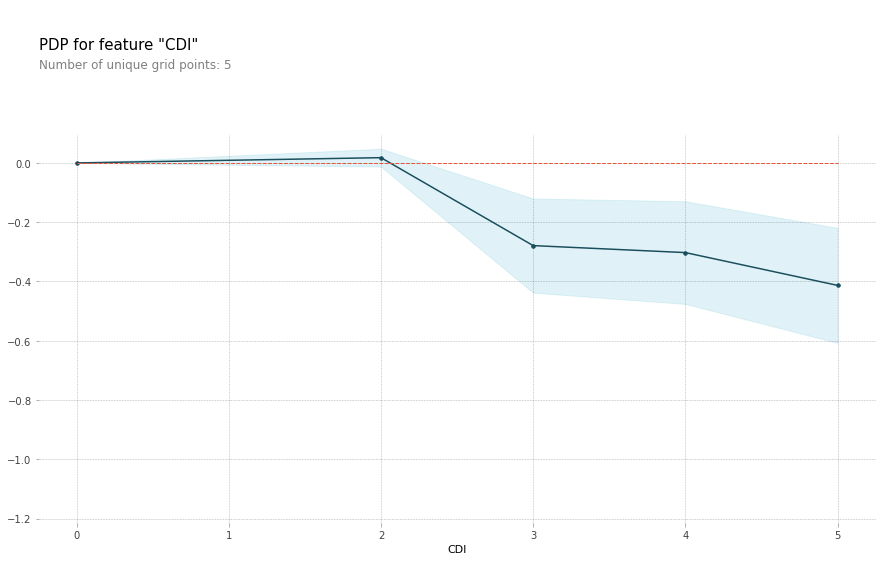

In [ ]:
features = X_test.columns
feature = 'CDI'
pdp_dist = pdp.pdp_isolate(model=xgb_ov_hyp, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);
# 도시 개발지수가 0.6-0.7(CDI 2 이하)미만인 곳에 종사하는 사람들의 이직희망율이 양수의 영역에서 그려지고 있음.
# 반대로 0.7-0.8 이상(CDI 2 이상)의 개발지수를 보이는 도시에서 종사하는 사람들은 이직 희망율이 감소하는것을 볼 수 있음
# 또한, 도시개발지수가 0.6미만(CDI 1)인 도시보다 0.6이상 0.7이하(CDI 2)인 도시에서 이직 희망율이 더 높은것을 보면, 0.7이상(CDI 2번 이상)의 도시에서부터 인프라가 크게 차이날것이라고 추측해볼 수 있음